### Multilinear regression using Wine Dataset

Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

C:\Users\Shree\Anaconda331\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Shree\Anaconda331\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
wine_quality = pd.read_csv("winequality-red.csv",sep=';')

In [3]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Step for converting white space in columns to _ value for better handling
wine_quality.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [5]:
eda_colnms = [ 'volatile_acidity', 'chlorides', 'sulphates',
'alcohol','quality']

In [6]:
# Plots - pair plots
sns.set(style='whitegrid',context = 'notebook')

Pair plots for sample five variables are shown as follows; however, we encourage you to try
various combinations to check various relationships visually between the various other
variables:

C:\Users\Shree\Anaconda331\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


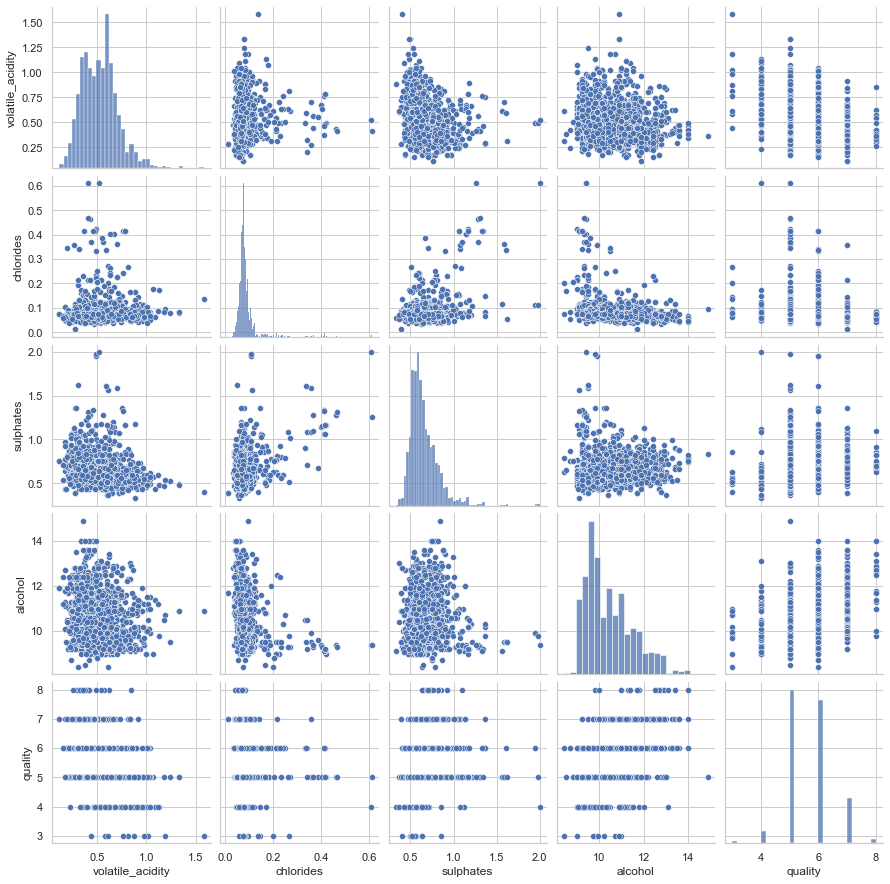

In [9]:
sns.pairplot(wine_quality[eda_colnms],size = 2.5,x_vars= eda_colnms, y_vars = eda_colnms)
plt.show();

In addition to visual plots, correlation coefficients are calculated to show the level of
correlation in numeric terminology; these charts are used to drop variables in the initial
stage, if there are many of them to start with:

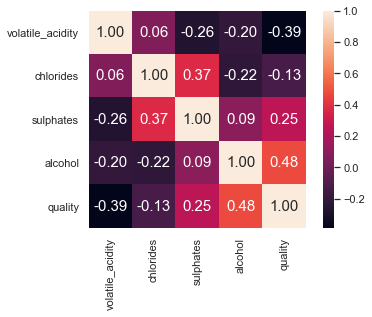

In [10]:
 # Correlation coefficients
corr_mat = np.corrcoef(wine_quality[eda_colnms].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True,
                       fmt='.2f',annot_kws={'size': 15}, yticklabels=eda_colnms,
                       xticklabels=eda_colnms)
plt.show();

In the following method, we have used the backward selection method, starting with all the 11 independent variables and removing them one by one from analysis after each iteration
(insignificant and multi-collinear variable):

In [11]:
colnms = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
pdx = wine_quality[colnms]
pdy = wine_quality["quality"]

Create the train and test data by randomly performing the data split. The random_state
(random seed) is used for reproducible results:

In [12]:
 x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size =
                                                  0.7, random_state = 42)

In the following code, adding constant means creating an intercept variable. If we do not
create an intercept, the coefficients will change accordingly:

In [13]:
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train,x_train_new)

The following code creates a model summary including R-squared, adjusted R-squared, and
the p-value of independent variables:

In [14]:
full_res = full_mod.fit()
print ("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          8.34e-100
Time:                        19:46:50   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9

The following code calculated VIF (Variance Inflation Factor) for all individual variables from first principles. Here we
are calculating the R-squared value for each variable and converting it into a VIF value:

In [20]:
print ("\nVariance Inflation Factor")
cnames = x_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar],sm.add_constant( x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,5))


Variance Inflation Factor
fixed_acidity 7.18937
volatile_acidity 1.82365
citric_acid 3.13924
residual_sugar 1.74195
chlorides 1.46312
free_sulfur_dioxide 1.97306
total_sulfur_dioxide 2.20481
density 5.90221
pH 3.22383
sulphates 1.42779
alcohol 2.93019


In [21]:
# Prediction of data
y_pred = full_res.predict(x_test_new)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['y_pred']
pred_data = pd.DataFrame(y_pred_df['y_pred'])
y_test_new = pd.DataFrame(y_test)
y_test_new.reset_index(inplace=True)

In [22]:
pred_data['y_test'] = pd.DataFrame(y_test_new['quality'])

In [23]:
# R-square calculation
rsqd = r2_score(y_test_new['quality'].tolist(),
y_pred_df['y_pred'].tolist())
print ("\nTest R-squared value:",round(rsqd,4))


Test R-squared value: 0.3514
